In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

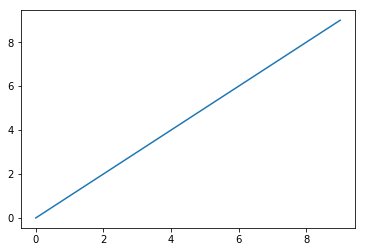

In [5]:
plt.plot(data)

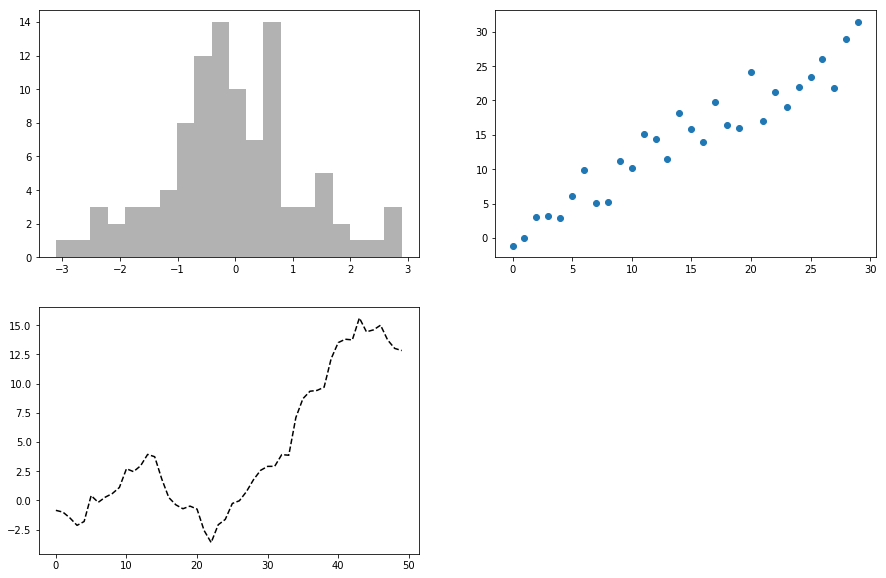

In [23]:
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

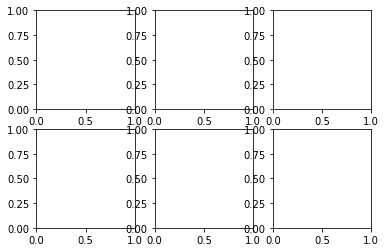

In [24]:
fig, axes = plt.subplots(2, 3)

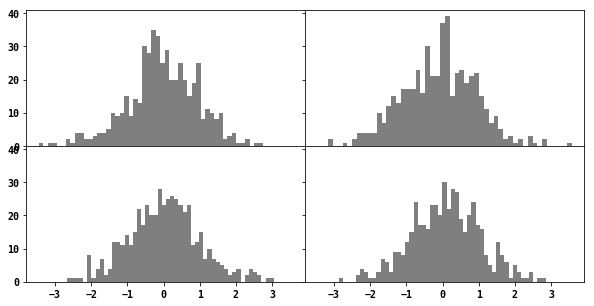

In [238]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

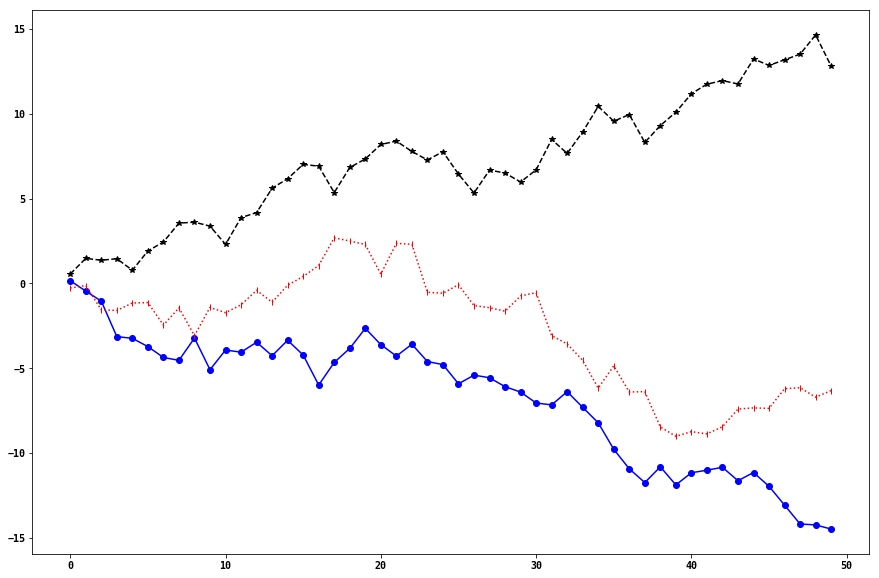

In [239]:
from numpy.random import randn

total = 50

plt.figure(figsize = (15, 10))
plt.plot(randn(total).cumsum(), 'bo-')
plt.plot(randn(total).cumsum(), color='k', linestyle='dashed', marker='*')
plt.plot(randn(total).cumsum(), color='r', linestyle=':', marker='|')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

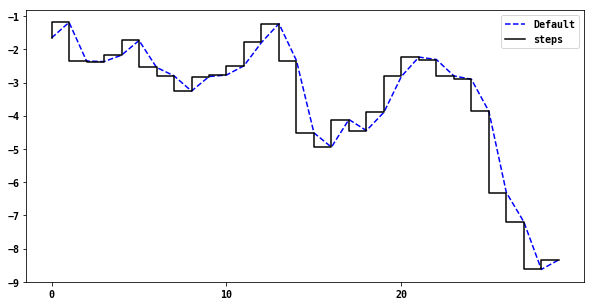

In [240]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', label='Default')
plt.plot(data, 'k-', drawstyle='steps', label='steps')
plt.legend(loc='best')
#plt.xlim(-10, 60)
#plt.ylim(-5, 50)
plt.xticks(np.arange(0,30,10))
plt.xticklabels()

[Text(0,0,'one'),
 Text(0,0,'two'),
 Text(0,0,'three'),
 Text(0,0,'four'),
 Text(0,0,'five')]

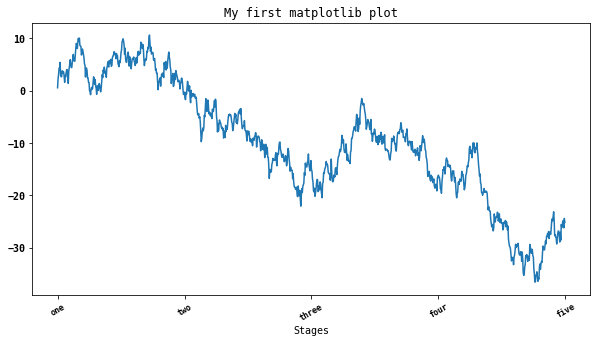

In [241]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
labels

https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
https://matplotlib.org/api/markers_api.html

In [242]:
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,17.2,'Stages'), Text(0.5,1,'My first matplotlib plot')]

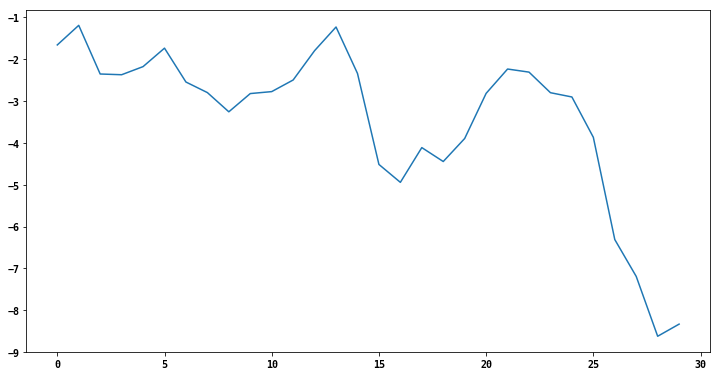

In [243]:
fig = plt.figure()
ax = fig.add_axes([0.025, 0.025, 0.95, 0.95])
ax.plot(data)

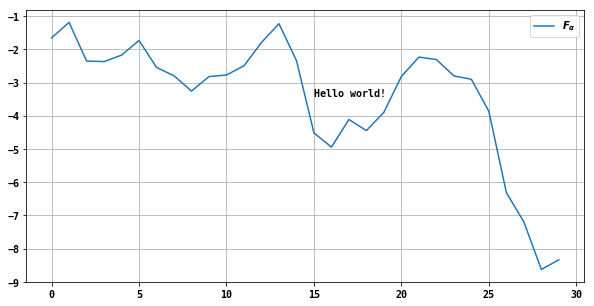

In [244]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data, label= r"$\mathit{F_{\alpha}}$")

ax.text(len(data) / 2,np.mean(data), 'Hello world!', family='monospace', fontsize=10, weight = 'bold')
ax.legend()
ax.grid()

In [245]:
import pandas as pd

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

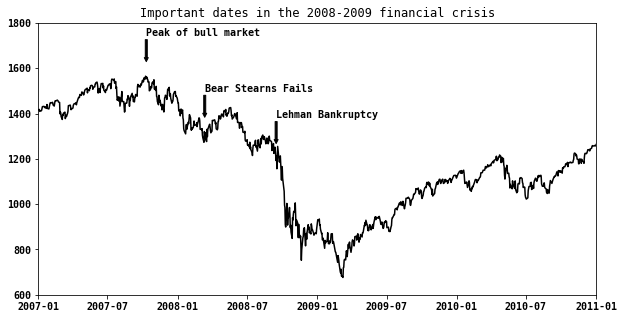

In [246]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx = data['SPX']
#spx.plot(ax=ax, style='k-')
ax.plot(spx, 'k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
    ]

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75), 
                xytext=(date, spx.asof(date) + 225), 
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', 
                verticalalignment='top')
    

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')


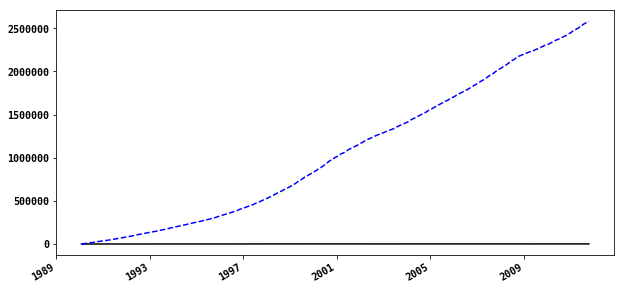

In [247]:
spx = data['SPX']
spx.plot(style='k-')

spx2 = (spx * np.random.rand(len(spx))).cumsum()

spx2.plot(style='b--')

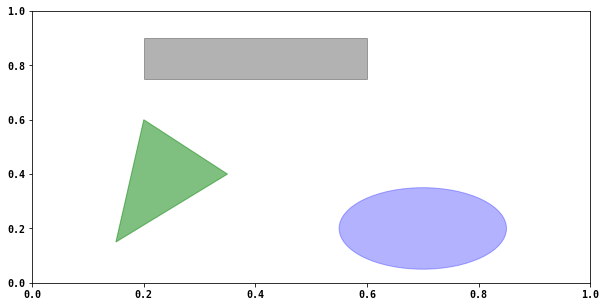

In [248]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig.savefig('figpath.pdf')

In [249]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [250]:
from io import BytesIO
buffer = BytesIO()
fig.savefig(buffer)
plot_data = buffer.getvalue()

plot_data[:10]

b'\x89PNG\r\n\x1a\n\x00\x00'

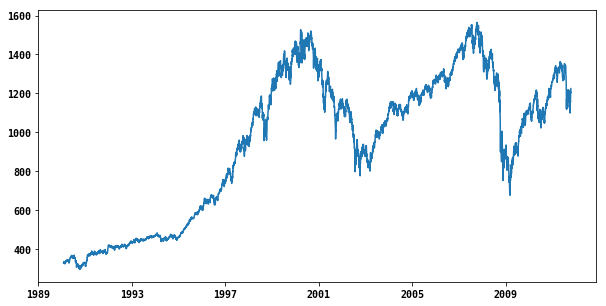

In [251]:
plt.rc('figure', figsize=(10, 5))
font_options = {'family' : 'monospace',
    'weight' : 'bold',
    'size' : 10}
plt.rc('font', **font_options)
plt.plot(data)

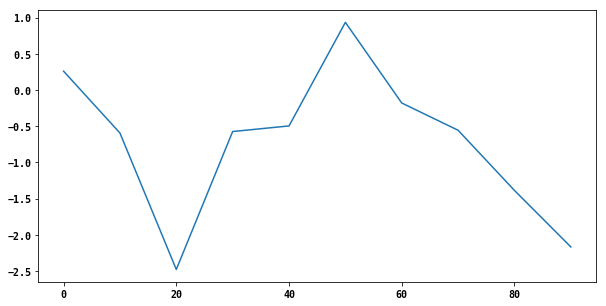

In [255]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

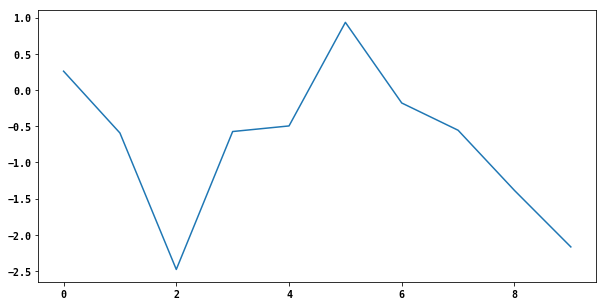

In [256]:
s.plot(use_index = False)

In [258]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))

df

,A,B,C,D
0,1.848373,-0.729562,1.216088,-0.722054
10,2.045435,-1.872088,1.415672,1.582517
20,2.140437,-1.358645,2.411068,1.757155
30,0.575605,-3.312623,1.277371,0.707629
40,0.563128,-3.145736,1.601930,0.865638
50,3.895843,-0.449512,1.273519,0.899388
60,2.613058,-2.118463,2.956703,3.064783
70,1.306553,-2.146205,2.422117,2.721151
80,2.369775,-0.830745,1.440051,1.757103
90,1.341015,-1.007855,3.964331,1.575302


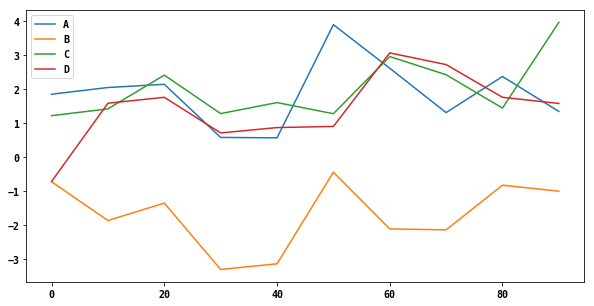

In [260]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BD020F0>,
      dtype=object)

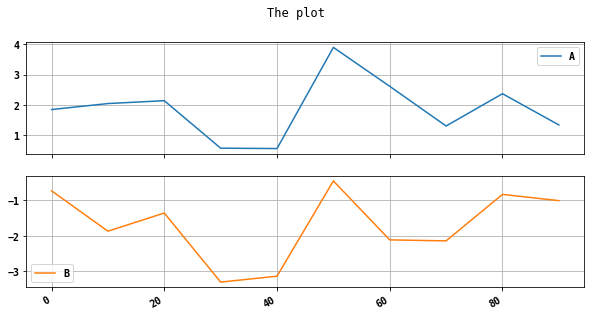

In [273]:
df[['A', 'B']].plot(grid = True, subplots = True, sharex = True, title = "The plot")

In [276]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.249877
b    0.510853
c    0.155739
d    0.535866
e    0.123734
f    0.715972
g    0.967698
h    0.371609
i    0.299970
j    0.443785
k    0.519249
l    0.418148
m    0.539449
n    0.140343
o    0.610415
p    0.486891
dtype: float64

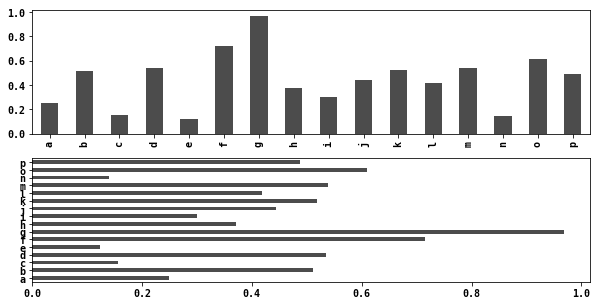

In [279]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [281]:
df = pd.DataFrame(np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.393784,0.421746,0.602602,0.441015
two,0.553105,0.100529,0.921361,0.678898
three,0.539890,0.057868,0.980640,0.902528
four,0.753832,0.363746,0.539739,0.416466
five,0.501972,0.537614,0.519704,0.445532
six,0.188187,0.488787,0.402218,0.775018


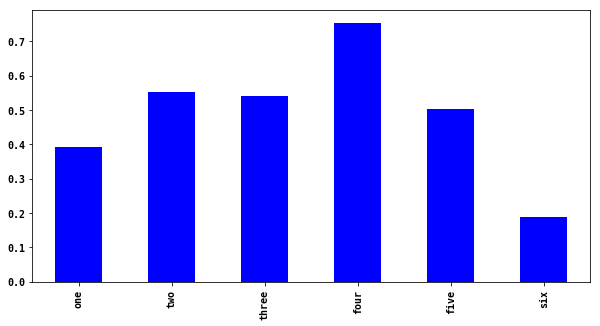

In [286]:
df['A'].plot.bar(color = 'b')

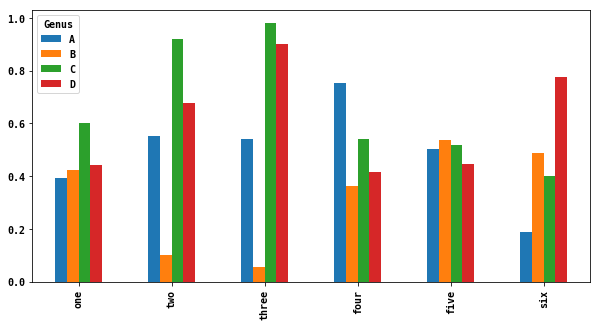

In [288]:
df.plot.bar()

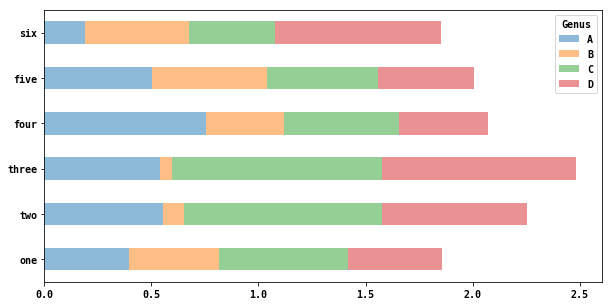

In [291]:
df.plot.barh(stacked=True, alpha=0.5)

In [293]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [295]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [297]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [298]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [301]:
party_counts.sum(axis = 1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [303]:
party_counts.div(party_counts.sum(1), axis = 0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


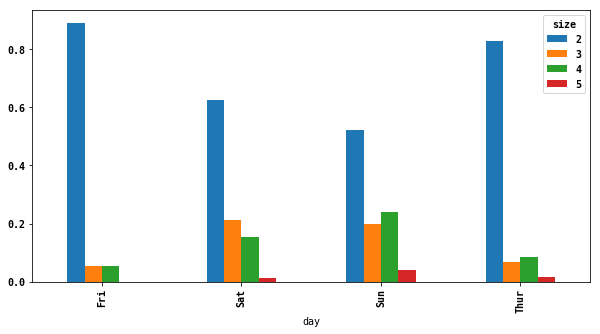

In [304]:
party_pcts.plot.bar()

In [305]:
import seaborn as sns

In [306]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [308]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


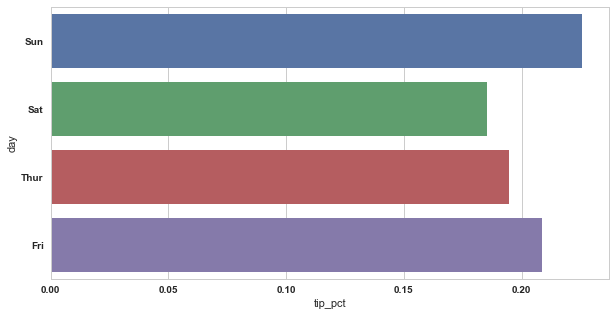

In [325]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci = False)

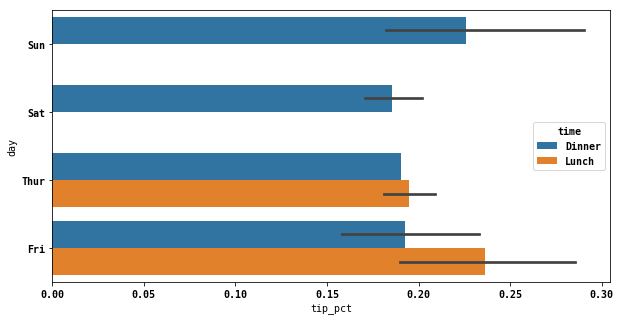

In [317]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

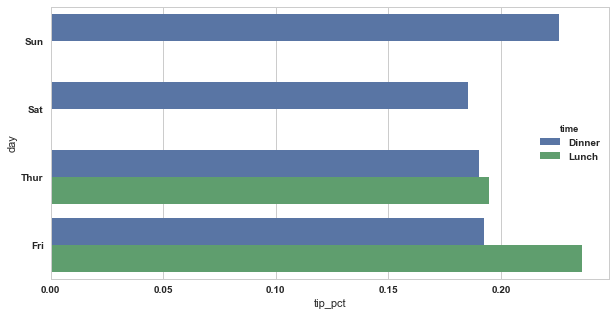

In [321]:
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', ci = False)

In [327]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


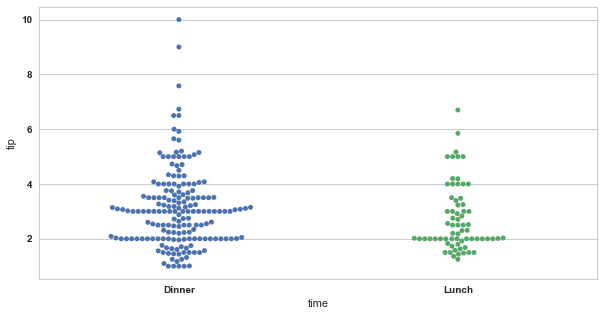

In [334]:
# Construct iris plot
sns.swarmplot(x = "time", y="tip", data=tips)

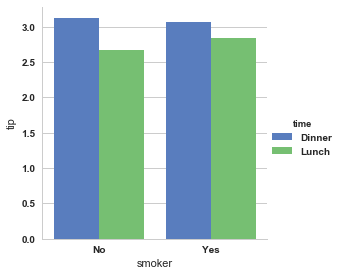

In [344]:
sns.factorplot(hue= "time", y = "tip", x =  "smoker", data=tips, kind="bar", palette="muted", legend=True, ci = False)

In [345]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [350]:
plt.style.use("classic")

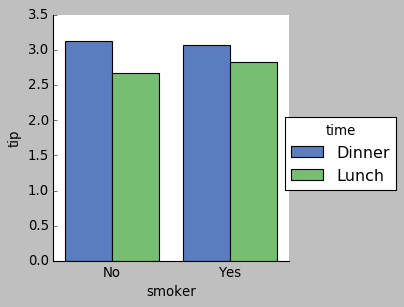

In [351]:
sns.factorplot(hue= "time", y = "tip", x =  "smoker", data=tips, kind="bar", palette="muted", legend=True, ci = False)

In [ ]:
sns.factorplot(hue= "time", y = "tip", x =  "smoker", data=tips, kind="bar", palette="muted", legend=True, ci = False)

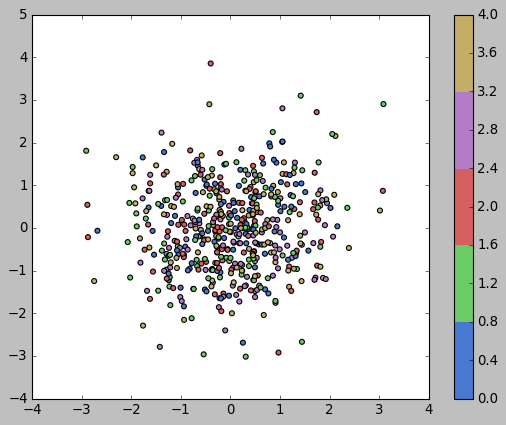

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define a variable N
N = 500

# Construct the colormap
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

# Initialize the data
data1 = np.random.randn(N)
data2 = np.random.randn(N)
# Assume that there are 5 possible labels
colors = np.random.randint(0,5,N)

# Create a scatter plot
plt.scatter(data1, data2, c=colors, cmap=cmap)

# Add a color bar
plt.colorbar()

# Show the plot
plt.show()